# Usiminas: Residência em Ciência de Dados

**Disciplina:** Probabilidade e Análise de Dados com Python

**Professores:** Flávio Figueiredo e Pedro Melo

**Aula 9:** Estudo de caso ENEM

# CADERNO DE EXERCÍCIOS - AULA 09

Utilizando as técnicas aprendidas até agora, analise os microdados do ENEM 2020 para responder às perguntas a seguir. Caso seja possível, gere visualizações apropriadas para cada uma delas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Carregando o dataframe
# Encoding cp860 é o encoding para português. utf-8 não lê estes dados.
enem = pd.read_csv('MICRODADOS_ENEM_2020_FILTRADOS.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'MICRODADOS_ENEM_2020_FILTRADOS.csv'

## 1. Quais os 5 estados brasileiros com maior taxa de ausência (geral) no ENEM 2020?


UF: Abstenções
AM: 0.623
RO: 0.544
TO: 0.495
GO: 0.471
CE: 0.458


<Axes: xlabel='SG_UF_ESC', ylabel='Taxa'>

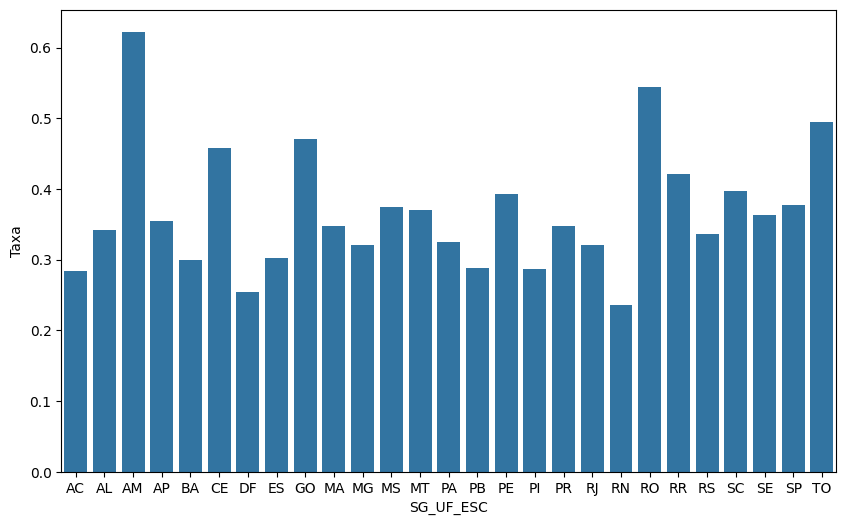

In [ ]:
ausentes = enem[enem['SG_UF_ESC'].notna()]
ausentes = ausentes.loc[(ausentes.TP_PRESENCA_CH == 0) & (ausentes.TP_PRESENCA_CN == 0) & (ausentes.TP_PRESENCA_LC == 0) & (ausentes.TP_PRESENCA_MT == 0)]
ausentes = ausentes.groupby('SG_UF_ESC').count().reset_index()

total_inscritos = enem.groupby('SG_UF_ESC').count().reset_index()
total_inscritos['Taxa'] = ausentes['NU_INSCRICAO'] / total_inscritos['NU_INSCRICAO']
total_inscritos = total_inscritos[['SG_UF_ESC', 'Taxa']]

lista = total_inscritos.sort_values(by='Taxa', ascending=False).iloc[0:5,0:2].values
print('UF: Abstenções')
for i in lista:
    print(f'{i[0]}: {round(i[1],3)}')

plt.figure(figsize=(10, 6))
sns.barplot(x='SG_UF_ESC', y='Taxa', data=total_inscritos, color='tab:blue')

## 2. Como a probabilidade de um(a) candidato(a) obter nota superior a 600 na redação varia com o tempo desde que ele(a) concluiu o segundo grau? Esta tendência é a mesma observada em Ciências da natureza?

**Ovservação:** O valor da coluna TP_ANO_CONCLUIU já indica o tempo desde a conclusão até prova. Entretanto, o valor 0 não necessariamente indica que o estudante concluiu em 2020! Elimine este valor para análises mais precisas.

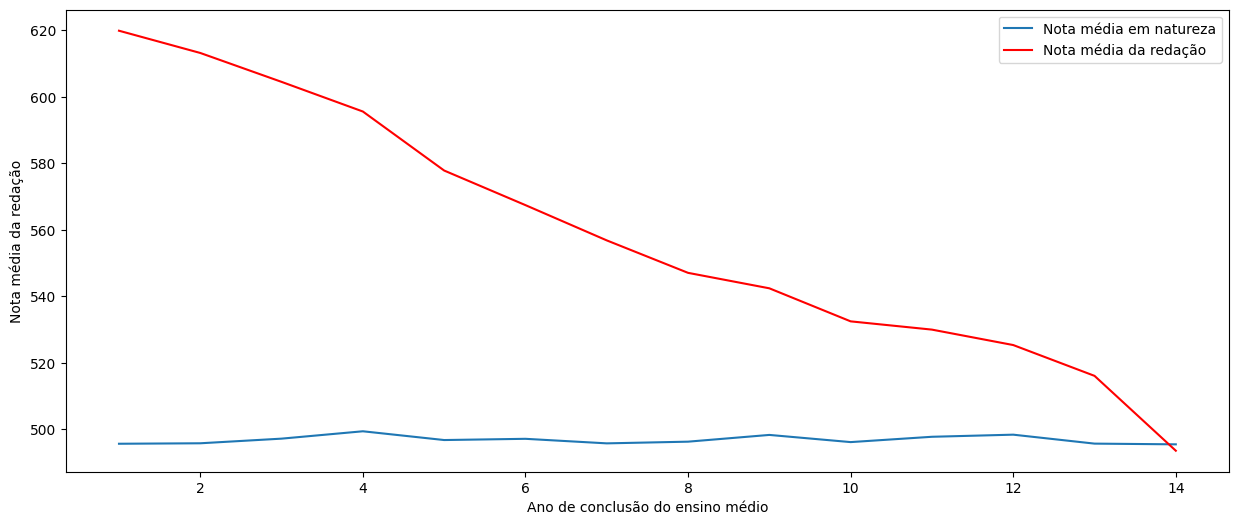

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

ex2 = enem[enem['TP_ANO_CONCLUIU'] != 0]
(ex2[['NU_NOTA_CN', 'TP_ANO_CONCLUIU']].dropna()
                                       .groupby('TP_ANO_CONCLUIU')
                                       .mean()
                                       .plot(ax=ax,kind='line', color='tab:blue', 
                                            xlabel='Ano de conclusão do ensino médio', 
                                            ylabel='Nota média em natureza', label='Nota média em natureza')
)
ex22 = enem[enem['TP_ANO_CONCLUIU'] != 0]
(ex22[['NU_NOTA_REDACAO', 'TP_ANO_CONCLUIU']].dropna()
                                             .groupby('TP_ANO_CONCLUIU')
                                             .mean()
                                             .plot(ax=ax,kind='line', color='red', 
                                                    xlabel='Ano de conclusão do ensino médio', 
                                                    ylabel='Nota média da redação', label='Nota média da redação')
)
plt.legend(['Nota média em natureza', 'Nota média da redação'])

A media das notas de naturez se mantem com o decorrer do tempo que a pessoa conclui o ensino médio, enquanto a de redação cai drásticamente durante o tempo.

In [ ]:
maior600red = enem[enem['TP_ANO_CONCLUIU'] != 0]
maior600red = maior600red[maior600red['NU_NOTA_REDACAO'] > 600]
maior600red= (maior600red[['NU_NOTA_REDACAO', 'TP_ANO_CONCLUIU']]
                                       .dropna()
                                       .groupby('TP_ANO_CONCLUIU')
                                       .count()
                                       
)
total_red = enem[enem['TP_ANO_CONCLUIU'] != 0]
total_red = (total_red[['NU_NOTA_REDACAO', 'TP_ANO_CONCLUIU']]
                                       .dropna()
                                       .groupby('TP_ANO_CONCLUIU')
                                       .count()
                                       
)
maior600red['Taxa'] = maior600red['NU_NOTA_REDACAO'] / total_red['NU_NOTA_REDACAO']
print(maior600red['Taxa'])


TP_ANO_CONCLUIU
1     0.504193
2     0.479170
3     0.452303
4     0.428218
5     0.385598
6     0.363550
7     0.337927
8     0.315741
9     0.302505
10    0.283048
11    0.276728
12    0.274450
13    0.252992
14    0.211382
Name: Taxa, dtype: float64


In [ ]:
maior600cn = enem[enem['TP_ANO_CONCLUIU'] != 0]
maior600cn = maior600cn[maior600cn['NU_NOTA_CN'] > 600]
maior600cn= (maior600cn[['NU_NOTA_CN', 'TP_ANO_CONCLUIU']].dropna()
                                       .groupby('TP_ANO_CONCLUIU')
                                       .count()
                                       
)
total_cn = enem[enem['TP_ANO_CONCLUIU'] != 0]
total_cn = (total_cn[['NU_NOTA_CN', 'TP_ANO_CONCLUIU']].dropna()
                                       .groupby('TP_ANO_CONCLUIU')
                                       .count()
                                       
)
maior600cn['Taxa'] = maior600cn['NU_NOTA_CN'] / total_cn['NU_NOTA_CN']
print(maior600cn['Taxa'])


TP_ANO_CONCLUIU
1     0.118802
2     0.127767
3     0.136350
4     0.137731
5     0.125511
6     0.119180
7     0.114459
8     0.109645
9     0.111963
10    0.105346
11    0.105816
12    0.112971
13    0.101320
14    0.091733
Name: Taxa, dtype: float64


Como pode ser observado a probabilidade de um estudante tirar acima de 600 na redação cai mais que pela metade entre 1 e 14 anos.
Já em ciencias da natureza a probabilidade se mantem em média independente do ano de conclusão

## 3. Como fatores como renda (Q006), número de pessoas que moram na mesma residência que o candidato (Q005), e a faixa etária (TP_FAIXA_ETARIA) do participante influenciam em sua nota em Matemática?

**Sugestões:** Para análises mais precisas, elimine as notas 0 e os candidatos que faltaram nas provas analisadas (ex:TP_PRESENCA_MT=0). Como as notas são uma escala contínua, você pode optar, se preferir, por torná-la discreta, criando classes que englobem faixas de notas (ex: 200<NU_NOTA_MT<400).

<Axes: >

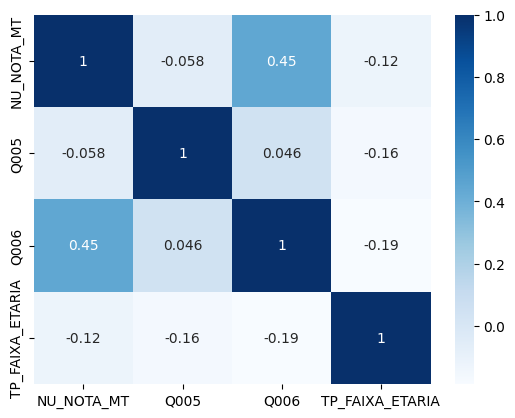

In [ ]:

ex3 =enem[['NU_NOTA_MT', 'Q005','Q006', 'TP_FAIXA_ETARIA']].dropna()
ex3['NU_NOTA_MT'] = ex3['NU_NOTA_MT']/100
ex3['NU_NOTA_MT'] = ex3['NU_NOTA_MT'].astype(int)
ex3['Q006'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16}, inplace=True)
plt.subplot()
sns.heatmap(ex3.corr(), annot=True, cmap='Blues')

De acordo com mapa de correlação, o unico fator que realmente influencia positivamente na nota é a renda, de forma que quanto maior a renda, maior a nota. Enquanto os outros influencia em menor proporção e de forma negativa na nota.

Text(0.5, 0, '')

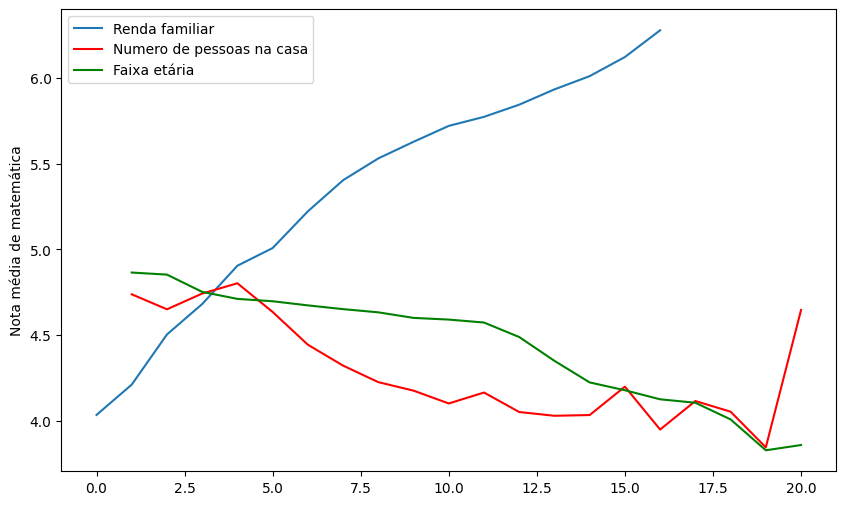

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ex3[['Q006', 'NU_NOTA_MT']].groupby('Q006').mean().plot(ax=ax,kind='line', color='tab:blue', ylabel='Nota média de matemática')
ex3[['Q005', 'NU_NOTA_MT']].groupby('Q005').mean().plot(ax=ax,kind='line', color='red', ylabel='Nota média de matemática')
ex3[['TP_FAIXA_ETARIA', 'NU_NOTA_MT']].groupby('TP_FAIXA_ETARIA').mean().plot(ax=ax,kind='line', color='green', ylabel='Nota média de matemática')
plt.legend(['Renda familiar', 'Numero de pessoas na casa', 'Faixa etária'])
plt.xlabel('')
